<b>Task 1 : Image Transformation using OpenCV</b>

Using mr bean image code the following cells:

In [1]:
#read image
import cv2
import matplotlib.pyplot as plt
import numpy as np
bean = cv2.cvtColor(cv2.imread('../data/bean.png'), cv2.COLOR_BGR2RGB)

Q1: Image Translation -> shift of an image from one location to another

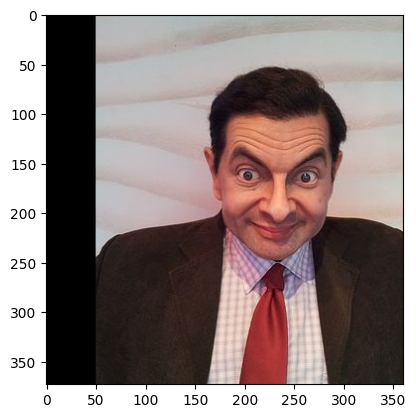

In [2]:
#start code
tx = 50  
matrix = np.float32([[1, 0, tx], [0, 1, 0]])
bean_shift = cv2.warpAffine(bean, matrix, (bean.shape[1], bean.shape[0]))
plt.imshow(bean_shift)
#end code

Q2: Image Reflection -> flip the image horizontally & vertically

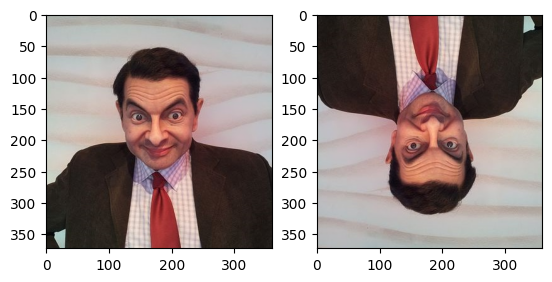

In [3]:
#start code
#hoz 
bean_hoz = cv2.flip(bean, 1)
bean_vec = cv2.flip(bean, 0)
plt.subplot(1, 2, 1)
plt.imshow(bean_hoz)
plt.subplot(1, 2, 2)
plt.imshow(bean_vec)
#end code

Q3: Image Rotation -> rotate the image in any degree you want eg: (30, 60, 90)

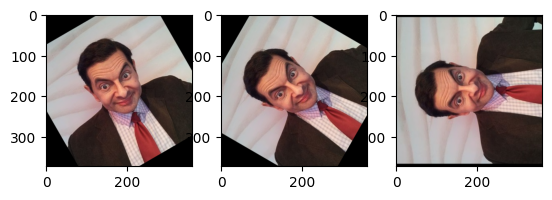

In [4]:
#start code
height, width = bean.shape[:2]
center = (width / 2, height / 2)
rotation_30 = cv2.getRotationMatrix2D(center, 30, 1.0)
bean_30 = cv2.warpAffine(bean, rotation_30, (width, height))

rotation_60 = cv2.getRotationMatrix2D(center, 60, 1.0)
bean_60 = cv2.warpAffine(bean, rotation_60, (width, height))

rotation_90 = cv2.getRotationMatrix2D(center, 90, 1.0)
bean_90 = cv2.warpAffine(bean, rotation_90, (width, height))

plt.subplot(1, 3, 1)
plt.imshow(bean_30)
plt.subplot(1, 3, 2)
plt.imshow(bean_60)
plt.subplot(1, 3, 3)
plt.imshow(bean_90)
#end code

Q4: Image Scaling -> resize image in any height and width you want eg: (480,640), (720, 800)

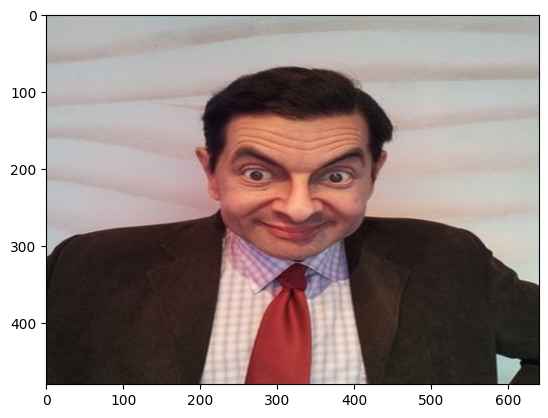

In [5]:
#start code
bean_resize = cv2.resize(bean,(640,480))
plt.imshow(bean_resize)
#end code

Q5: Image Cropping -> remove the background pixel of image (not importent)

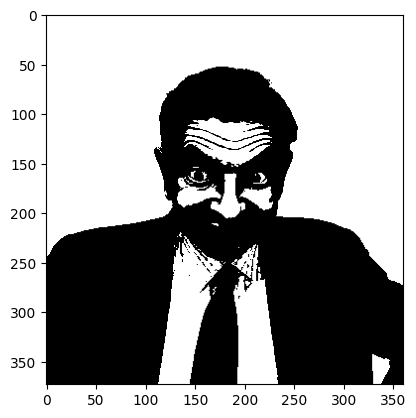

In [6]:
myimage_grey = cv2.cvtColor(bean, cv2.COLOR_BGR2GRAY)
ret,baseline = cv2.threshold(myimage_grey,127,255,cv2.THRESH_TRUNC)
ret,background = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY)
ret,foreground = cv2.threshold(baseline,0,255,cv2.THRESH_BINARY_INV)
foreground = cv2.bitwise_and(bean,bean, mask=foreground)
background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
finalimage = background+foreground
plt.imshow(finalimage)

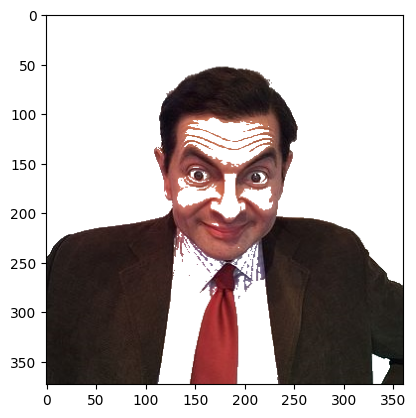

In [7]:
myimage_grey = cv2.cvtColor(bean, cv2.COLOR_BGR2GRAY)
ret,baseline = cv2.threshold(myimage_grey,127,255,cv2.THRESH_TRUNC)
ret,background = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY)
ret,foreground = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY_INV)
foreground = cv2.bitwise_and(bean,bean, mask=foreground)
background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
finalimage = background+foreground
plt.imshow(finalimage)

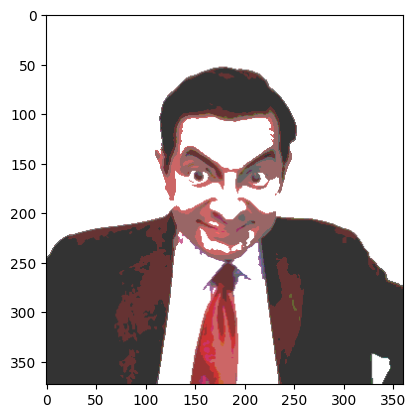

In [8]:
myimage = cv2.GaussianBlur(bean,(5,5), 0)
bins=np.array([0,51,102,153,204,255])
myimage[:,:,:] = np.digitize(myimage[:,:,:],bins,right=True)*51
myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
ret,background = cv2.threshold(myimage_grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
ret,foreground = cv2.threshold(myimage_grey,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
foreground = cv2.bitwise_and(myimage,myimage, mask=foreground)
finalimage = background+foreground
plt.imshow(finalimage)

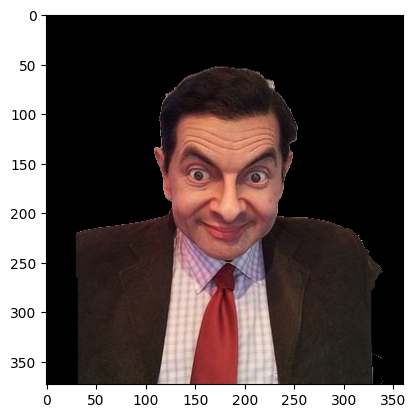

In [9]:
mask = np.zeros(bean.shape[:2], np.uint8)
rect = (30, 50, bean.shape[1]-50, bean.shape[0]-50)
cv2.grabCut(bean, mask, rect, None, None, 50, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
result = bean * mask2[:, :, np.newaxis]
plt.imshow(result)


Q6: Image Shearing -> shear the image once on X-Axis & Y-Axis

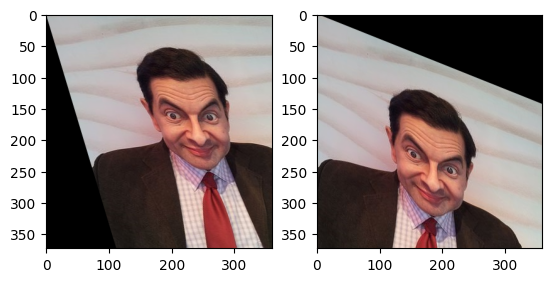

In [10]:
height, width = bean.shape[:2]
shear_matrix_x = np.float32([[1, 0.3, 0], [0, 1, 0]])
shear_matrix_y = np.float32([[1, 0, 0], [0.4, 1, 0]])
sheared_image_x = cv2.warpAffine(bean, shear_matrix_x, (width, height))
sheared_image_y = cv2.warpAffine(bean, shear_matrix_y, (width, height))

plt.subplot(1, 2, 1)
plt.imshow(sheared_image_x)
plt.subplot(1, 2, 2)
plt.imshow(sheared_image_y)

Great Job Friends 🤗